In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#import glob <br>
We can use glob to search for a specific file pattern, or perhaps more usefully, search for files where the filename matches a certain pattern by using wildcard characters.

#impoert cv2 <br>
OpenCV-Python is a library of Python bindings designed to solve computer vision problems.
cv2.imread() method loads an image from the specified file. If the image cannot be read (because of missing file, improper permissions, unsupported or invalid format) then this method returns an empty matrix.

#keras <br>
Keras is a neural network Application Programming Interface (API) for Python that is tightly integrated with TensorFlow, which is used to build machine learning models. Keras’ models offer a simple, user-friendly way to define a neural network, which will then be built for you by TensorFlow. 

#Import OS 
The OS module in Python provides functions for interacting with the operating system. OS comes under Python's standard utility modules. This module provides a portable way of using operating system-dependent functionality. The *os* and *os. path* modules include many functions to interact with the file system.

# Seaborn Library
Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps you explore and understand your data.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import glob 
import cv2 
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
from keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.mobilenet import MobileNet
from sklearn.ensemble import VotingClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import sklearn
from sklearn.model_selection import train_test_split

#Capture training data and labels into respective lists
images = []
labels = []

#  /content/drive/MyDrive/Output/Generated_Mel_Spectrogram/mel_spectrogram_from_VCC2016-20220517T150102Z-001/mel_spectrogram_from_VCC2016/*

for directory_path in glob.glob("/content/drive/MyDrive/5-5-Canny-Segmented/*"):
    label = directory_path.split("\\")[-1]
    # print("Tail of '% s:'", label[1])
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.JPG")):
        
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img=np.asarray(img)
        img=(img/126.5)
        images.append(img)
        labels.append(label)
        
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, train_size = 0.8, random_state = 1, shuffle = True)

# Random_state is used to set the seed for the random generator so that we can ensure that the results that we get can be reproduced. Because of the nature of splitting the data in train and test is randomised you would get different data assigned to the train and test data unless you can control for the random factor.
# For example, imagine you have numbers: 1,2,3,4,5 and you want to select two random numbers. Without using a random_state you would get different things: i.e. first 2,5 then 3,4 and so on.
# When you control the random generator by setting the random state to 0, 1 or another number, everyone would get the same random numbers generated: i.e random_state=1 then the random numbers are 1,3 and everyone who will pick two random numbers using random_state=1 from 1,2,3,4,5 will get the same two numbers as you: 1,3.

# random state:
# Whenever randomization is part of a Scikit-learn algorithm, a random_state parameter may be provided to control the random number generator used. Note that the mere presence of random_state doesn’t mean that randomization is always used, as it may be dependent on another parameter, e.g. shuffle, being set.
# -----> if random_state = None : Calling the function multiple times will produce different results.
# -----> if random_state = Integer : Will produce the same results across different calls

/content/drive/MyDrive/5-5-Canny-Segmented/Tomato___Leaf_Mold
/content/drive/MyDrive/5-5-Canny-Segmented/Potato___Early_blight
/content/drive/MyDrive/5-5-Canny-Segmented/Apple___healthy
/content/drive/MyDrive/5-5-Canny-Segmented/Cherry_(including_sour)___Powdery_mildew
/content/drive/MyDrive/5-5-Canny-Segmented/Cherry_(including_sour)___healthy
/content/drive/MyDrive/5-5-Canny-Segmented/Grape___healthy
/content/drive/MyDrive/5-5-Canny-Segmented/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
/content/drive/MyDrive/5-5-Canny-Segmented/Tomato___healthy
/content/drive/MyDrive/5-5-Canny-Segmented/Potato___healthy
/content/drive/MyDrive/5-5-Canny-Segmented/Apple___Apple_scab


In [5]:
#Convert lists to arrays        
train_images = np.array(X_train)
train_labels = np.array(Y_train)

In [6]:
#Convert lists to arrays                
test_images = np.array(X_test)
test_labels = np.array(Y_test)


In [7]:
train_images.shape

(4000, 128, 128, 3)

In [8]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [9]:
print(train_labels_encoded)

[1 1 2 ... 6 9 8]


In [10]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded


In [11]:
x_train.shape

(4000, 128, 128, 3)

In [ ]:
# np.save('/content/drive/MyDrive/Modified_code/numpy_on_disk/train_on_disk.npy', x_train)
# np.save('/content/drive/MyDrive/Modified_code/numpy_on_disk/test_on_disk.npy', x_test)

In [ ]:
# import mmap

# stable = True # Set to True for latest pip version or False for main branch in GitHub
# !pip install {"tsai -U" if stable else "git+https://github.com/timeseriesAI/tsai.git"} >> /dev/null

# from tsai.all import *
# my_setup()

# print(f'X array: {os.path.getsize("/content/drive/MyDrive/Modified_code/numpy_on_disk/train_on_disk.npy"):12} bytes ({bytes2GB(os.path.getsize("/content/drive/MyDrive/Modified_code/numpy_on_disk/train_on_disk.npy")):3.2f} GB)')
# print(f'y array: {os.path.getsize("/content/drive/MyDrive/Modified_code/numpy_on_disk/test_on_disk.npy"):12} bytes ({bytes2GB(os.path.getsize("/content/drive/MyDrive/Modified_code/numpy_on_disk/test_on_disk.npy")):3.2f} GB)')

In [ ]:
# X_on_disk = np.load('/content/drive/MyDrive/Modified_code/numpy_on_disk/train_on_disk.npy', mmap_mode='c')
# y_on_disk = np.load('/content/drive/MyDrive/Modified_code/numpy_on_disk/test_on_disk.npy', mmap_mode='c')

In [ ]:
# # Normalize pixel values to between 0 and 1

In [12]:
#One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#**Feature Extraction - 1st CNN MODEL**

##VGG16

In [13]:
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [14]:
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [15]:
#Now, let us use features from convolutional network for RF
feature_extractor_vgg16=VGG_model.predict(x_train)

In [16]:
fe_vgg16_test=VGG_model.predict(x_test)

In [17]:
features_vgg16 = feature_extractor_vgg16.reshape(feature_extractor_vgg16.shape[0], -1)

In [18]:
f_vgg16_test=fe_vgg16_test.reshape(fe_vgg16_test.shape[0],-1)

In [19]:
print(f_vgg16_test.shape)

(1000, 8192)


In [ ]:
# X_for_RF = features_vgg16 #This is our X input to RF

#Machine Learning Models For Classifications

##Stochastic Gradient Descent

In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [21]:
sgd =  SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd.fit(features_vgg16, y_train)
y_pred=sgd.predict(f_vgg16_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix , plot_confusion_matrix , precision_score,   recall_score ,  f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.907

##Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

dtree = DecisionTreeClassifier(max_depth=300, random_state=101, max_features = None, min_samples_leaf = 5)
dtree.fit(features_vgg16, y_train)
y_pred=dtree.predict(f_vgg16_test)

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix , plot_confusion_matrix , precision_score,   recall_score ,  f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.564

##K-Nearest Neighbours

In [23]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [24]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(features_vgg16 , y_train)
y_pred=knn.predict(f_vgg16_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix , plot_confusion_matrix , precision_score,   recall_score ,  f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.85

##Logistic Regression

###Used In  Binary Classifications

In [24]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [26]:
features_vgg16.shape

(4000, 8192)

In [27]:
lr =  LogisticRegression()
lr.fit(features_vgg16 , y_train)
y_pred=lr.predict(f_vgg16_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [25]:
y_pred

array([5, 1, 9, 4, 5, 7, 5, 1, 6, 4, 2, 7, 2, 7, 9, 7, 5, 9, 2, 7, 3, 9,
       0, 4, 2, 1, 0, 7, 5, 4, 1, 4, 6, 1, 8, 5, 5, 5, 1, 1, 2, 3, 4, 2,
       9, 6, 1, 1, 9, 9, 9, 4, 1, 5, 3, 7, 7, 6, 2, 7, 1, 6, 2, 4, 9, 0,
       9, 5, 7, 3, 7, 7, 5, 6, 6, 4, 9, 5, 4, 1, 5, 4, 4, 7, 6, 8, 1, 4,
       9, 5, 9, 9, 8, 7, 8, 8, 4, 8, 6, 1, 4, 2, 6, 3, 1, 4, 5, 2, 5, 2,
       6, 6, 1, 9, 9, 5, 9, 8, 1, 6, 3, 4, 2, 2, 9, 6, 7, 5, 5, 9, 5, 7,
       2, 9, 5, 7, 2, 1, 2, 9, 4, 5, 7, 9, 9, 5, 8, 1, 4, 3, 0, 2, 4, 2,
       3, 4, 3, 7, 1, 4, 8, 5, 2, 5, 6, 3, 3, 2, 5, 1, 7, 4, 3, 1, 2, 3,
       3, 6, 6, 5, 2, 4, 2, 9, 0, 7, 4, 3, 8, 4, 4, 1, 6, 1, 4, 1, 7, 0,
       2, 7, 5, 4, 8, 1, 6, 1, 0, 7, 9, 6, 5, 8, 5, 8, 7, 8, 7, 7, 9, 5,
       7, 1, 7, 3, 9, 5, 3, 0, 7, 8, 2, 1, 7, 8, 7, 7, 1, 6, 5, 4, 1, 7,
       8, 3, 1, 9, 0, 1, 7, 4, 1, 1, 4, 1, 9, 6, 7, 4, 2, 9, 3, 9, 6, 1,
       4, 4, 8, 4, 6, 1, 4, 7, 8, 1, 9, 3, 9, 5, 6, 9, 7, 5, 0, 7, 7, 3,
       4, 6, 5, 8, 7, 8, 2, 5, 1, 2, 5, 2, 5, 9, 6,

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix , plot_confusion_matrix , precision_score,   recall_score ,  f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.949

In [ ]:
precision_score(y_test,y_pred,average=None)

array([0.92307692, 0.95959596, 0.96581197, 1.        , 0.95294118,
       0.97029703, 0.96842105, 0.9223301 , 0.96969697, 0.87903226])

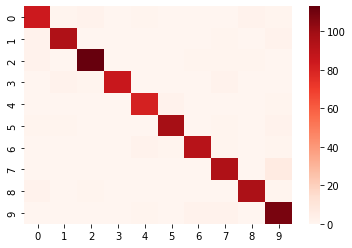

In [ ]:
# #cm_lr=confusion_matrix(y_test,y_pred)
# plot_confusion_matrix(y_test,y_pred)
# plt.show()
import seaborn as sb
sb.heatmap(cm_lr,cmap="Reds")

In [ ]:
cm_lr


array([[ 84,   1,   2,   0,   1,   0,   0,   0,   2,   1],
       [  2,  95,   0,   0,   0,   0,   0,   1,   0,   2],
       [  2,   0, 113,   0,   0,   0,   1,   1,   1,   0],
       [  0,   2,   1,  86,   0,   0,   0,   2,   0,   0],
       [  0,   0,   0,   0,  81,   2,   0,   0,   0,   1],
       [  1,   1,   0,   0,   0,  98,   0,   1,   0,   2],
       [  0,   0,   0,   0,   2,   1,  92,   1,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,  95,   0,   7],
       [  2,   0,   1,   0,   0,   0,   0,   0,  96,   1],
       [  0,   0,   0,   0,   1,   0,   2,   2,   0, 109]])

##Random Forest

In [26]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [27]:
# Train the model on training data
RF_model.fit(features_vgg16, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [28]:
print(RF_model.score(features_vgg16, y_train))

1.0


In [29]:
#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)


In [30]:
X_test_features_vgg16 = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [31]:
print(X_test_feature.shape)

(1000, 4, 4, 512)


In [32]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features_vgg16)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [33]:
print(prediction_RF.shape)

(1000,)


In [34]:
print(test_labels.shape)

(1000,)


In [35]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.845


##XGBoost

In [36]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import xgboost as xgb

In [38]:
xgb_classifier = xgb.XGBClassifier(tree_method = "gpu_hist")

In [39]:
xgb_classifier.fit(features_vgg16, y_train)

XGBClassifier(objective='multi:softprob', tree_method='gpu_hist')

In [40]:
predictions = xgb_classifier.predict(X_test_features_vgg16)
prediction_XG = le.inverse_transform(predictions)

In [41]:
prediction_XG

array(['/content/drive/MyDrive/5-5-Canny-Segmented/Grape___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Apple___Apple_scab',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Tomato___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Grape___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Tomato___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Grape___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Apple___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Potato___Early_blight',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Cherry_(including_sour)___Powdery_mildew',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Cherry_(including_sour)___Powdery_mildew',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Apple___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Cherry_(including_sour)___Powdery

In [42]:
print("Accuracy of Model::",metrics.accuracy_score(test_labels, prediction_XG))

Accuracy of Model:: 0.9


##SVC- Support Vector Classifier

In [43]:
from sklearn.svm import SVC

In [44]:
svc = SVC(C=1.0, random_state=1, kernel='linear')

In [45]:
svc.fit(features_vgg16, y_train)

SVC(kernel='linear', random_state=1)

In [46]:
X_test_features_vgg16 = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [47]:
X_test_features = VGG_model.predict(x_test)

In [48]:
predictions = svc.predict(X_test_features_vgg16 )
prediction_SVC = le.inverse_transform(predictions)

In [49]:
prediction_SVC

array(['/content/drive/MyDrive/5-5-Canny-Segmented/Grape___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Apple___Apple_scab',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Tomato___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Grape___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Tomato___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Grape___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Apple___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Potato___Early_blight',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Potato___Early_blight',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Cherry_(including_sour)___Powdery_mildew',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Apple___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Cherry_(including_sour)___Powdery_mildew',
       '/

In [50]:
print("Accuracy of Model::",metrics.accuracy_score(test_labels, prediction_SVC))

Accuracy of Model:: 0.964


##ENSEMBLE

In [53]:
final_model = VotingClassifier(estimators=[('rf', RF_model), ('xgb', xgb_classifier), ('svc', svc),('knn',knn),('sgd ',sgd )], voting='hard')
 

In [54]:
final_model.fit(features_vgg16, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(objective='multi:softprob',
                                            tree_method='gpu_hist')),
                             ('svc', SVC(kernel='linear', random_state=1)),
                             ('knn', KNeighborsClassifier(n_neighbors=15)),
                             ('sgd ',
                              SGDClassifier(loss='modified_huber',
                                            random_state=101))])

In [58]:
predictions = final_model.predict(X_test_features_vgg16) # X_test_features
prediction_final = le.inverse_transform(predictions)

In [59]:
prediction_final

array(['/content/drive/MyDrive/5-5-Canny-Segmented/Grape___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Apple___Apple_scab',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Tomato___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Grape___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Tomato___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Grape___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Apple___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Potato___Early_blight',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Cherry_(including_sour)___Powdery_mildew',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Cherry_(including_sour)___Powdery_mildew',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Apple___healthy',
       '/content/drive/MyDrive/5-5-Canny-Segmented/Cherry_(including_sour)___Powdery

In [60]:
print("Accuracy of Model::",metrics.accuracy_score(test_labels, prediction_final))

Accuracy of Model:: 0.938


#**Feature Extraction - 2nd CNN MODEL**


##MobileNET

In [61]:
MobileNet_model = MobileNet(weights='imagenet', include_top=True, input_shape=(128, 128, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
# for layer in ResNet_model.layers:
# 	layer.trainable = False
    
MobileNet_model.summary()  #Trainable parameters will be 0

17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32) 

In [62]:
feature_extractor_MobileNet =MobileNet_model.predict(x_train)


In [63]:
features_MobileNet = feature_extractor_MobileNet.reshape(feature_extractor_MobileNet.shape[0], -1)

In [64]:
print(features_MobileNet.shape)


(4000, 1000)


#Machine Learning Models For Classifications

##Stochastic Gradient Descent

In [76]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [77]:
sgd =  SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd.fit(features_MobileNet, y_train)
y_pred=sgd.predict(X_test_feature)

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix , plot_confusion_matrix , precision_score,   recall_score ,  f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.639

##Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

dtree = DecisionTreeClassifier(max_depth=300, random_state=101, max_features = None, min_samples_leaf = 5)
dtree.fit(features_MobileNet, y_train)
y_pred=dtree.predict(X_test_feature)

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix , plot_confusion_matrix , precision_score,   recall_score ,  f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.625

##K-Nearest Neighbours

In [83]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [84]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(features_MobileNet, y_train)
y_pred=knn.predict(X_test_feature)

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix , plot_confusion_matrix , precision_score,   recall_score ,  f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.52

##RANDOM FOREST

In [65]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [66]:
# Train the model on training data
RF_model.fit(features_MobileNet, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [67]:
print(RF_model.score(features_MobileNet, y_train))

1.0


In [68]:
#Send test data through same feature extractor process
X_test_feature = MobileNet_model.predict(x_test)


In [69]:
X_test_features_mobilenet = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [70]:
print(X_test_features.shape)

(1000, 4, 4, 512)


In [72]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_feature)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [73]:
print(prediction_RF.shape)

(1000,)


In [74]:
print(test_labels.shape)

(1000,)


In [75]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.89


##XGBOOST

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_classifier = xgb.XGBClassifier(tree_method = "gpu_hist")

In [ ]:
xgb_classifier.fit(features_MobileNet, y_train)  #crashing over here

In [ ]:
predictions = xgb_classifier.predict(X_test_features)
prediction_XG = le.inverse_transform(predictions)

In [ ]:
prediction_XG

In [ ]:
print("Accuracy of Model::",metrics.accuracy_score(test_labels, prediction_XG))

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(C=1.0, random_state=1, kernel='linear')

In [ ]:
svc.fit(features_MobileNet, y_train)

In [ ]:
predictions = svc.predict(X_test_features)
prediction_SVC = le.inverse_transform(predictions)

In [ ]:
prediction_SVC

In [ ]:
print("Accuracy of Model::",metrics.accuracy_score(test_labels, prediction_SVC))